In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import pandas as pd
DATA=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\DATA.csv")
DATA

#EventID                        Time  Latitude  Longitude  Depth/Km  \
0             79  1985-01-02 23:26:09.581820   41.7150    13.9410       5.8   
1             89  1985-01-03 01:14:43.481820   41.6770    13.9310       6.1   
2            199  1985-01-04 17:26:06.731820   46.1580     7.1740      10.0   
3            229  1985-01-05 00:28:21.311820   45.3380     6.6410       5.0   
4            239  1985-01-05 04:15:30.131820   45.4090     6.6270      10.0   
...          ...                         ...       ...        ...       ...   
181772  24334191  2020-04-29 11:45:50.661820   45.9167    12.1917      10.1   
181773  24335541  2020-04-29 14:43:14.461820   38.4090    13.5617      28.2   
181774  24336421  2020-04-29 16:52:06.501820   42.8882    13.0363      10.0   
181775  24336481  2020-04-29 16:58:41.341820   37.7683    14.6293      38.0   
181776  24337031  2020-04-29 19:49:26.781820   37.8797    12.9638      10.0   

              Author  Catalog  Contributor  ContributorID MagType  Magnitude  \
0       BULLETIN-VAX      NaN          NaN            NaN      Md        2.6   
1       BULLETIN-VAX      NaN          NaN            NaN      Md        2.5   
2       BULLETIN-VAX      NaN          NaN            NaN       M        3.8   
3       BULLETIN-VAX      NaN          NaN            NaN       M        3.7   
4       BULLETIN-VAX      NaN          NaN            NaN       M        3.2   
...              ...      ...          ...            ...     ...        ...   
181772   SURVEY-INGV      NaN          NaN            NaN      ML        1.7   
181773   SURVEY-INGV      NaN          NaN            NaN      ML        2.3   
181774   SURVEY-INGV      NaN          NaN            NaN      ML        1.8   
181775   SURVEY-INGV      NaN          NaN            NaN      ML        2.2   
181776   SURVEY-INGV      NaN          NaN            NaN      ML        1.6   

       MagAuthor                                EventLocationName  
0             --                   6 km S Civitella Alfedena (AQ)  
1             --                           6 km NE Picinisco (FR)  
2             --               Confine Italia-Svizzera (SVIZZERA)  
3             --                 Confine Italia-Francia (FRANCIA)  
4             --                 Confine Italia-Francia (FRANCIA)  
...          ...                                              ...  
181772        --                          2 km SW Refrontolo (TV)  
181773        --  Costa Siciliana centro-settentrionale (Palermo)  
181774        --                                1 km N Preci (PG)  
181775        --                              3 km SE Troina (EN)  
181776        --                  10 km E Calatafimi-Segesta (TP)  

[181777 rows x 13 columns]

0         1985-01-02 22:58:04.594130
1         1985-01-03 00:46:38.494130
2         1985-01-04 16:58:01.744130
3         1985-01-05 00:00:16.324130
4         1985-01-05 03:47:25.144130
                     ...            
181772    2020-04-29 11:17:45.674130
181773    2020-04-29 14:15:09.474130
181774    2020-04-29 16:24:01.514130
181775    2020-04-29 16:30:36.354130
181776    2020-04-29 19:21:21.794130
Name: Time, Length: 181777, dtype: object

#### CALCULATING B-VALUE AND THE ASSOCIATED STANDARD ERROR WITH AKI AND SHI & BOLT

([1.5,
  1.6,
  1.7,
  1.8,
  1.9,
  2.0,
  2.1,
  2.2,
  2.3,
  2.4,
  2.5,
  2.6,
  2.7,
  2.8,
  2.9,
  3.0,
  3.1,
  3.2,
  3.3,
  3.4,
  3.5,
  3.6,
  3.7,
  3.8,
  3.9,
  4.0,
  4.1,
  4.2,
  4.3,
  4.4,
  4.5,
  4.6,
  4.7,
  4.8,
  4.9,
  5.0,
  5.1,
  5.2,
  5.3,
  5.4,
  5.5,
  5.6,
  5.7,
  5.8,
  5.9,
  6.0,
  6.1],
 [0.6862597488788854,
  0.7070211705231993,
  0.7295533184160946,
  0.7589443501658026,
  0.797300788436409,
  0.8453791168183765,
  0.9046756419718647,
  0.963177706063051,
  1.0197064600940036,
  1.0707300658433485,
  1.1100432613861009,
  1.1387227579468435,
  1.1692817409117597,
  1.1774228085300729,
  1.1909190425009526,
  1.2101693792756678,
  1.2213972645693272,
  1.2335520695516604,
  1.2414935550073698,
  1.2157816628704627,
  1.2000242263115297,
  1.187678082840255,
  1.1826077433697137,
  1.1626621215959605,
  1.1488990580661351,
  1.1368602558999785,
  1.0882605203982265,
  1.0623444734656868,
  1.0558451190701783,
  1.0097697318740935,
  1.029526428

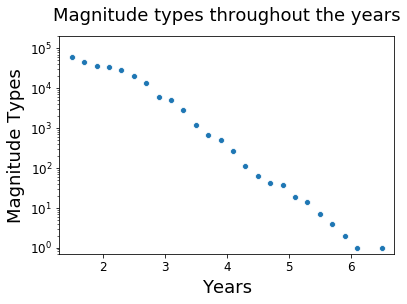

In [22]:
import math
from math import sqrt
binning=0.1
Mmin=3.0
Mc=1.6
list_bin=[]
list_b=[]
list_sigma1=[]
list_sigma2=[]
for k in range(15,62,1):
    M_cutoff=k/10 #use this
    #evaluation of maximum likelihood B^
    magnitude=DATA[DATA['Magnitude']>=M_cutoff].loc[:,'Magnitude']
    mean_magn=np.mean(magnitude)
    b1=math.log10(math.exp(1))/(mean_magn-(M_cutoff-binning/2))
    sigma1=b1/sqrt(len(magnitude))
    ## standard error (Aki and Shi & Bolt)
    scarto_list=[]
    for j in magnitude:
        scarto=(j-mean_magn)**2
        scarto_list.append(scarto)
    sum_scarto_list=sum(scarto_list)
    sigma2=2.30*b1**2*sqrt(sum_scarto_list/(len(magnitude)*(len(magnitude)-1)))
    list_bin.append(M_cutoff)
    list_b.append(b1)
    list_sigma1.append(sigma1)
    list_sigma2.append(sigma2)
#plot Gutemberg-Richter (0.2 binning)
b=1.21
magnitude=DATA['Magnitude']
list_1=pd.Series([1 for i in range(181777)],name='1' )
#bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.1,0.2)))
bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.2,0.2)))
number_of_earthquakes= pd.Series(np.array([np.count_nonzero((magnitude >= i ) & (magnitude <= i+0.2))
                                           for i in bin_magnitude]))
#bin_magnitude=np.add(bin_magnitude,0.2)
df1=pd.concat([bin_magnitude,number_of_earthquakes],axis=1)
df1.columns=['bin_magnitude','number_of_earthquakes']

plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1)
plt.xlabel("Years",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("Magnitude Types",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
plt.title('Magnitude types throughout the years',fontsize=18,pad=15.5)

plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.xlim((1.3, 6.7))
#explain influence of old catalogues
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\N.earthquakes_bin_magnitude.png",dpi=600)
list_bin,list_b,list_sigma1,list_sigma2

In [58]:
old=[0,1,2,3]
new=['Magnitude','B_value',r'$\sigma_{st-error}$ Aki', r'$\sigma_{st-error}$ Shi & Bolt ']
table_errors_b_value_magnitude=pd.DataFrame([list_bin,list_b,list_sigma1,list_sigma2]).T
table_errors_b_value_magnitude.rename(columns=dict(zip(old,new)),inplace=True)
table_errors_b_value_magnitude

Magnitude   B_value  $\sigma_{st-error}$ Aki  \
0         1.5  0.686260                 0.001610   
1         1.6  0.707021                 0.001770   
2         1.7  0.729553                 0.001954   
3         1.8  0.758944                 0.002171   
4         1.9  0.797301                 0.002434   
5         2.0  0.845379                 0.002755   
6         2.1  0.904676                 0.003152   
7         2.2  0.963178                 0.003621   
8         2.3  1.019706                 0.004177   
9         2.4  1.070730                 0.004829   
10        2.5  1.110043                 0.005576   
11        2.6  1.138723                 0.006432   
12        2.7  1.169282                 0.007448   
13        2.8  1.177423                 0.008561   
14        2.9  1.190919                 0.009875   
15        3.0  1.210169                 0.011438   
16        3.1  1.221397                 0.013228   
17        3.2  1.233552                 0.015325   
18        3.3  1.241494                 0.017745   
19        3.4  1.215782                 0.020252   
20        3.5  1.200024                 0.023146   
21        3.6  1.187678                 0.026445   
22        3.7  1.182608                 0.030274   
23        3.8  1.162662                 0.034390   
24        3.9  1.148899                 0.039086   
25        4.0  1.136860                 0.044387   
26        4.1  1.088261                 0.049415   
27        4.2  1.062344                 0.055303   
28        4.3  1.055845                 0.062325   
29        4.4  1.009770                 0.068706   
30        4.5  1.029526                 0.078048   
31        4.6  1.020104                 0.087473   
32        4.7  1.069033                 0.101014   
33        4.8  1.117986                 0.117197   
34        4.9  1.131556                 0.134291   
35        5.0  1.163660                 0.155501   
36        5.1  1.109413                 0.173261   
37        5.2  1.160463                 0.202011   
38        5.3  1.361572                 0.252838   
39        5.4  1.426042                 0.304033   
40        5.5  1.343179                 0.346807   
41        5.6  1.489010                 0.429840   
42        5.7  1.389742                 0.491348   
43        5.8  2.043739                 0.722571   
44        5.9  1.579253                 0.789626   
45        6.0  1.737178                 1.002960   
46        6.1  1.737178                 1.228370   

    $\sigma_{st-error}$ Shi & Bolt   
0                          0.001281  
1                          0.001398  
2                          0.001528  
3                          0.001696  
4                          0.001919  
5                          0.002220  
6                          0.002633  
7                          0.003130  
8                          0.003731  
9                          0.004441  
10                         0.005236  
11                         0.006122  
12                         0.007223  
13                         0.008316  
14                         0.009662  
15                         0.011358  
16                         0.013290  
17                         0.015647  
18                         0.018431  
19                         0.020883  
20                         0.023836  
21                         0.027259  
22                         0.031446  
23                         0.035579  
24                         0.040440  
25                         0.045986  
26                         0.049440  
27                         0.053993  
28                         0.060156  
29                         0.062386  
30                         0.070720  
31                         0.076200  
32                         0.089755  
33                         0.106381  
34                         0.120195  
35                         0.139280  
36                         0.140145  
37                         0.161208  
38                       

In [23]:
#a=DATA[(DATA['Magnitude']>=3.0)  & (DATA['Magnitude']<3.1)].loc[:,'Magnitude']
#print(a)
#DATA['Magnitude']
bin_magnitude

0     1.5
1     1.7
2     1.9
3     2.1
4     2.3
5     2.5
6     2.7
7     2.9
8     3.1
9     3.3
10    3.5
11    3.7
12    3.9
13    4.1
14    4.3
15    4.5
16    4.7
17    4.9
18    5.1
19    5.3
20    5.5
21    5.7
22    5.9
23    6.1
24    6.3
25    6.5
dtype: float64

#### PLOT B-VALUE BY MAGNITUDE CUT-OFF

[]

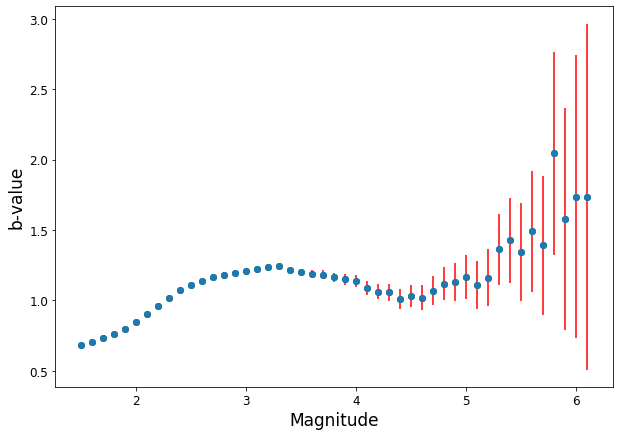

In [24]:
fig=plt.figure(figsize=(10,7))

plt.scatter(list_bin,list_b,c='g',)
plt.errorbar(list_bin,list_b, yerr=list_sigma1,fmt='o',ecolor='r')
plt.xlabel('Magnitude',fontsize=17)
plt.ylabel('b-value',fontsize=17)
plt.tick_params(labelsize=12)
plt.plot()
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\b_value_error_bar.png",dpi=600)

#### PLOT GUTENBERG-RICHTER (ITERATIVE)

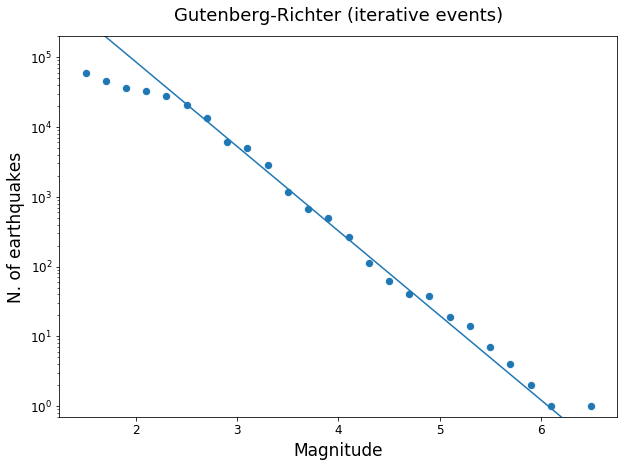

In [35]:
a_value=7.35
b=1.21
#b=math.log(1/((np.mean(magnitude)-(Mmin-binning/2))*(math.log(10))))# according to 'a non robust method to estimate the b value'
#b=math.log10(math.exp(1)/(np.mean(magnitude)-(Mmin-binning/2)))
Gutemberg_Richter=np.power(10,a_value-b*bin_magnitude) #here you can consider b or not
plt.figure(figsize=(10,7))
plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1,s=66)
plt.title('Gutenberg-Richter (iterative events)',fontsize=18,pad=15.5)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.plot(bin_magnitude,Gutemberg_Richter)
plt.xlabel('Magnitude',fontsize=17,labelpad=5) #set font and title of x label
plt.ylabel('N. of earthquakes',fontsize=17,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=12)
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter.png",dpi=600)

#### PLOT GUTENBERG-RICHTER (ITERATIVE AND CUMULATIVE)

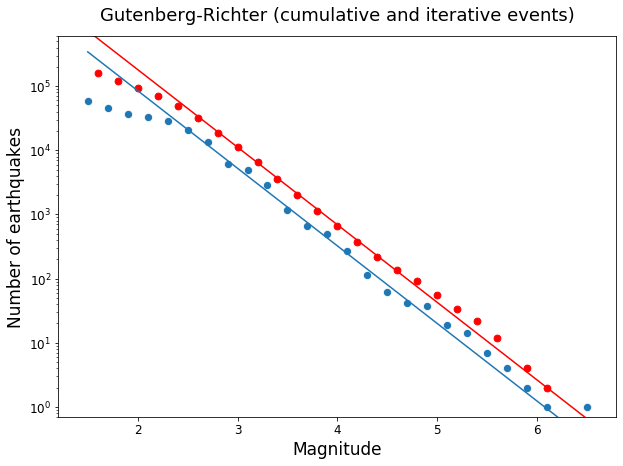

In [61]:
list_1=pd.Series([1 for i in range(181777)],name='1' )
a_value_cum=7.679
#another method
DATA_with_one=pd.concat(  [DATA,list_1],axis=1 )  

grouped=DATA_with_one.iloc[:,13].groupby(DATA['Magnitude'])
DATA['Magnitude'].sort_values(ascending=False) 
grouped_DATA_Magnitude=grouped.sum()
index_grouped_DATA_Magnitude=grouped_DATA_Magnitude.index
Gutemberg_Richter_cum=np.power(10,a_value_cum-b*bin_magnitude)
cum_series=pd.Series(np.add.accumulate(grouped_DATA_Magnitude.sort_index(ascending=False)))
#cum_ser_bin=[]
#for i in cum_series:
#    if
#    cum_ser_bin.append(i)
cum_series_1=[]
cum_series_1_index=[]
k=1
for i,z in zip(cum_series.index,cum_series):
    if k%2!=0 and k>2:
        pass
    else:
        cum_series_1_index.append([i])
        cum_series_1.append([z])
    k+=1
plt.figure(figsize=(10,7))    
plot=plt.scatter(cum_series_1_index,cum_series_1,s=46,color='red')
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.title('Gutenberg-Richter (cumulative and iterative events)',fontsize=18,pad=15.5)
plt.ylim((0.7, 600000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.plot(bin_magnitude,Gutemberg_Richter_cum,color='red')
plt.xlabel('Number of earthquakes',fontsize=17) #set font and title of x label
plt.ylabel('Magnitude',fontsize=17) #set font and title of y label
plt.tick_params(labelsize=12)
plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1,s=66)
plt.plot(bin_magnitude,Gutemberg_Richter)
plt.xlabel('Magnitude',fontsize=17) #set font and title of x label
plt.ylabel('Number of earthquakes',fontsize=17)
plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter_iterativeandcumulative.png",dpi=600)

In [60]:
magnitude=DATA['Magnitude']
new_bin_magnitude=pd.Series(np.array(np.arange(np.min(magnitude),np.max(magnitude)+0.1,0.1)))
new_Gutemberg_Richter=np.power(10,7.46-(b*new_bin_magnitude)) #here you can consider b or not
sumGR=new_Gutemberg_Richter.sum()
probabilities=np.divide(new_Gutemberg_Richter,sumGR)
probabilities

0     2.431673e-01
1     1.840370e-01
2     1.392852e-01
3     1.054157e-01
4     7.978204e-02
5     6.038167e-02
6     4.569883e-02
7     3.458638e-02
8     2.617611e-02
9     1.981094e-02
10    1.499357e-02
11    1.134763e-02
12    8.588259e-03
13    6.499877e-03
14    4.919320e-03
15    3.723104e-03
16    2.817767e-03
17    2.132579e-03
18    1.614006e-03
19    1.221533e-03
20    9.244962e-04
21    6.996891e-04
22    5.295477e-04
23    4.007791e-04
24    3.033228e-04
25    2.295647e-04
26    1.737421e-04
27    1.314938e-04
28    9.951880e-05
29    7.531910e-05
30    5.700397e-05
31    4.314248e-05
32    3.265165e-05
33    2.471184e-05
34    1.870273e-05
35    1.415484e-05
36    1.071285e-05
37    8.107839e-06
38    6.136279e-06
39    4.644138e-06
40    3.514836e-06
41    2.660144e-06
42    2.013284e-06
43    1.523720e-06
44    1.153201e-06
45    8.727807e-07
46    6.605491e-07
47    4.999253e-07
48    3.783599e-07
49    2.863552e-07
50    2.167231e-07
dtype: float64

#### GENERATE 1000 SYNTHETIC CATALOGUES FOR ITERATIVE EVENTS

In [63]:
#draw from an exponential distribution
#for i in new_bin_magnitude:
new_bin_df=pd.Series(new_bin_magnitude)
ranger=range(1000)
for i in ranger:
    random_sample=np.random.choice(new_bin_magnitude,100000,p=probabilities)
    counts=np.array([])
    for j in new_bin_magnitude:
        counts=pd.Series(np.append(counts,np.count_nonzero(random_sample==j)))
    new_bin_df=pd.concat([new_bin_df,counts],axis=1)
new_bin_df.columns=[s for s in range(len(ranger)+1)]


#sns.distplot(random_sample,kde=False)

#plt.yscale('log')

In [64]:
new_bin_df2=new_bin_df.T
new_bin_df2
binned_array=new_bin_df2.loc[0,:]
dropped_new_bin_df2=new_bin_df2.drop([0])  #drop row if axis=0 and columns if 1
dropped_new_bin_df2.columns=binned_array
dropped_new_bin_df2

0         1.5      1.6      1.7      1.8     1.9     2.0     2.1     2.2  \
1     24374.0  18377.0  13864.0  10465.0  7989.0  6114.0  4542.0  3472.0   
2     24346.0  18449.0  14065.0  10509.0  8121.0  6012.0  4507.0  3364.0   
3     24305.0  18390.0  14025.0  10650.0  8033.0  6030.0  4486.0  3519.0   
4     24272.0  18509.0  13846.0  10532.0  7969.0  6018.0  4480.0  3485.0   
5     24433.0  18478.0  13892.0  10382.0  7864.0  6120.0  4574.0  3470.0   
...       ...      ...      ...      ...     ...     ...     ...     ...   
996   24455.0  18188.0  13934.0  10594.0  8034.0  6090.0  4580.0  3448.0   
997   24299.0  18456.0  14226.0  10435.0  8156.0  5888.0  4527.0  3477.0   
998   24249.0  18499.0  13942.0  10547.0  7784.0  6021.0  4729.0  3442.0   
999   24471.0  18279.0  13969.0  10565.0  7908.0  6032.0  4647.0  3506.0   
1000  24472.0  18479.0  13807.0  10462.0  7966.0  6036.0  4587.0  3400.0   

0        2.3     2.4  ...  5.6  5.7  5.8  5.9  6.0  6.1  6.2  6.3  6.4  6.5  
1     2630.0  1962.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     2545.0  1978.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
3     2648.0  1927.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4     2683.0  1954.0  ...  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5     2591.0  1987.0  ...  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  
...      ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
996   2552.0  2012.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
997   2630.0  1946.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
998   2598.0  1975.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
999   2612.0  1931.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1000  2508.0  2036.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1000 rows x 51 columns]

#### PLOT HISTOGRAMS OF ITERATIVE PLOTS FOR A GIVEN COLUMN IN THE GENERATED CATALOGUES

(array([ 19.,  87., 228., 280., 170., 153.,  45.,  15.,   1.,   2.]),
 array([ 7. ,  9.8, 12.6, 15.4, 18.2, 21. , 23.8, 26.6, 29.4, 32.2, 35. ]),
 <a list of 10 Patch objects>)

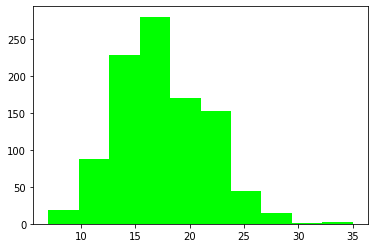

In [191]:


plt.hist(dropped_new_bin_df2.iloc[:,26],color='lime') #bins=bins
#bins_labels(bins)      



#### PLOT B-VALUE BY MAGNITUDE CUT-OFF FOR TWO SYNTHETIC CATALOGUES

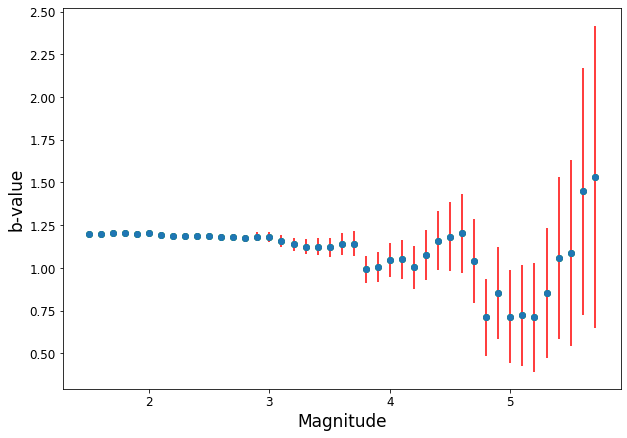

In [160]:

list_bin=[]
list_b=[]
list_sigma1=[]
def funct_synthetic(n,dropped_new_bin_df2):
    for k in range(15,58,1):
        M_cutoff_sample=k/10 #use this
        #evaluation of maximum likelihood B^
        magnitude_sample=dropped_new_bin_df2.columns.values
        count_sample=dropped_new_bin_df2.iloc[n][magnitude_sample>=M_cutoff_sample]
        mean_magnitude= np.average(count_sample.index.values, weights=count_sample)
        b1=math.log10(math.exp(1))/(mean_magnitude-(M_cutoff_sample-binning/2))
        sigma1=b1/sqrt(sum(count_sample))
        list_bin.append(M_cutoff_sample)
        list_b.append(b1)
        list_sigma1.append(sigma1)
funct_synthetic(3,dropped_new_bin_df2)
list_bin,list_b,list_sigma1
fig=plt.figure(figsize=(10,7))
#fig, ax1 = plt.subplots(1)
plt.scatter(list_bin,list_b,c='g',)
plt.errorbar(list_bin,list_b, yerr=list_sigma1,fmt='o',ecolor='r')
plt.xlabel('Magnitude',fontsize=17)
plt.ylabel('b-value',fontsize=17)
plt.tick_params(labelsize=12)

plt.plot()
plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\b_value_error_bar_sinthetic1.png",bbox_inches='tight',dpi=600)

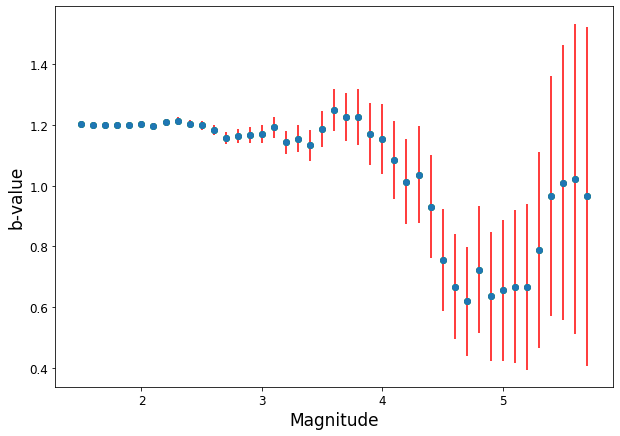

In [161]:
list_bin=[]
list_b=[]
list_sigma1=[]
funct_synthetic(2,dropped_new_bin_df2)
#fig=plt.figure(figsize=(16,10))
fig, ax1 = plt.subplots(1,figsize=(10,7))
ax1.scatter(list_bin,list_b,c='g',)
ax1.errorbar(list_bin,list_b, yerr=list_sigma1,fmt='o',ecolor='r')
ax1.set_xlabel('Magnitude',fontsize=17)
ax1.set_ylabel('b-value',fontsize=17)
ax1.tick_params(labelsize=12)
#funct_synthetic(996)
ax1.plot()
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\b_value_error_bar_sinthetic2.png",bbox_inches='tight',dpi=600)

#### GENERATE 0.95/ 0.05 CONFIDENCE INTERVAL FOR ITERATIVE SYNTHETIC CATALOGUES

In [119]:
from scipy.stats import poisson, kstest
low=np.array([])
up=np.array([])
medium=np.array([])
mean_arr=np.array([])
for i in dropped_new_bin_df2.columns: #iterate over columns
    mean_c=dropped_new_bin_df2[i].mean()
    mean_arr=np.append(mean_arr,mean_c)
    low=np.append(low,poisson.ppf(0.05, mean_c))
    up=np.append(up,poisson.ppf(0.95, mean_c))
    #cumulate curve
    #np.add.accumulate(dropped_new_bin_df2[i]) #cut this
    
#dropped_new_bin_df2 
#kolm_smirn

[[1.5, 1.0, 0.0],
 [1.6, 1.0, 0.0],
 [1.7, 1.0, 0.0],
 [1.8, 1.0, 0.0],
 [1.9, 1.0, 0.0],
 [2.0, 1.0, 0.0],
 [2.1, 1.0, 0.0],
 [2.2, 1.0, 0.0],
 [2.3, 1.0, 0.0],
 [2.4, 1.0, 0.0],
 [2.5, 1.0, 0.0],
 [2.6, 1.0, 0.0],
 [2.7, 1.0, 0.0],
 [2.8, 1.0, 0.0],
 [2.9, 1.0, 0.0],
 [3.0, 1.0, 0.0],
 [3.1, 1.0, 0.0],
 [3.2, 1.0, 0.0],
 [3.3, 1.0, 0.0],
 [3.4, 1.0, 0.0],
 [3.5, 1.0, 0.0],
 [3.6, 1.0, 0.0],
 [3.7, 1.0, 0.0],
 [3.8, 1.0, 0.0],
 [3.9, 1.0, 0.0],
 [4.0, 1.0, 0.0],
 [4.1, 0.9999999999987201, 0.0],
 [4.2, 0.9999683287581669, 0.0],
 [4.3, 0.9946501019683699, 0.0],
 [4.4, 0.9746501019683699, 0.0],
 [4.5, 0.9572498680518208, 0.0],
 [4.6, 0.9052498680518208, 0.0],
 [4.7, 0.8132498680518208, 0.0],
 [4.8, 0.741344746068543, 0.0],
 [4.9, 0.6803447460685429, 0.0],
 [5.0, 0.5873447460685429, 0.0],
 [5.1, 0.519344746068543, 2.356178635731473e-251],
 [5.2, 0.5, 1.064517291557782e-231],
 [5.3, 0.5, 1.064517291557782e-231],
 [5.4, 0.5, 1.064517291557782e-231],
 [5.5, 0.5, 1.064517291557782e-231],
 [5.

#### KOLMOGOROV-SMIRNOV TEST FOR NORMALITY

In [192]:
from scipy.stats import skew
KS=[]
it=0
old=[0,1,2,3]
for i in dropped_new_bin_df2.columns: #iterate over columns
    mean_c=dropped_new_bin_df2[i].mean()
    st_dev=statistics.stdev(dropped_new_bin_df2[i])
    standardised_sample=[]
    skew_item=skew(dropped_new_bin_df2[i])
    for item in dropped_new_bin_df2[i]:
        standardised_item=(item-mean_c)/st_dev 
        standardised_sample.append(standardised_item)
    kolm_smirn,p=kstest( standardised_sample ,'norm')
    KS.append([round(i,1),kolm_smirn,p,skew_item]) #KS test
    it+=1
KS_df=pd.DataFrame(KS)
new=['Magnitude','KS_test', 'p-value','Skewness']
KS_df.rename(columns=dict(zip(old,new)),inplace=True)
KS_df   
#KS

Magnitude   KS_test        p-value  Skewness
0         1.5  0.013494   9.932914e-01 -0.027819
1         1.6  0.014802   9.808003e-01  0.007952
2         1.7  0.022897   6.708743e-01  0.150867
3         1.8  0.014290   9.868076e-01 -0.051815
4         1.9  0.014781   9.810754e-01 -0.010402
5         2.0  0.023507   6.383821e-01  0.024368
6         2.1  0.022016   7.175397e-01  0.079084
7         2.2  0.036220   1.415670e-01 -0.048392
8         2.3  0.019348   8.482159e-01  0.022039
9         2.4  0.018606   8.793121e-01 -0.035535
10        2.5  0.023153   6.572262e-01  0.023920
11        2.6  0.015823   9.637115e-01 -0.011666
12        2.7  0.034313   1.855322e-01  0.114523
13        2.8  0.033419   2.095336e-01 -0.105112
14        2.9  0.026643   4.750926e-01  0.014474
15        3.0  0.020614   7.891107e-01 -0.022477
16        3.1  0.027412   4.369539e-01  0.077585
17        3.2  0.028942   3.673662e-01  0.051875
18        3.3  0.031497   2.692819e-01  0.007265
19        3.4  0.029156   3.582936e-01  0.114589
20        3.5  0.030229   3.151886e-01  0.099948
21        3.6  0.050600   1.152659e-02  0.268643
22        3.7  0.057563   2.539895e-03  0.157334
23        3.8  0.047710   2.039436e-02  0.150258
24        3.9  0.048473   1.760055e-02  0.036292
25        4.0  0.054860   4.675797e-03  0.178349
26        4.1  0.067599   2.037780e-04  0.275436
27        4.2  0.074343   2.978903e-05  0.387578
28        4.3  0.084084   1.340627e-06  0.187324
29        4.4  0.098347   7.163147e-09  0.340189
30        4.5  0.115079   5.409877e-12  0.500547
31        4.6  0.141100   7.824873e-18  0.540921
32        4.7  0.131749   1.350612e-15  0.496530
33        4.8  0.146370   3.664455e-19  0.658550
34        4.9  0.181332   3.032335e-29  0.646976
35        5.0  0.215178   4.031371e-41  0.797469
36        5.1  0.238038   2.437411e-50  1.067624
37        5.2  0.241464   8.337047e-52  1.011539
38        5.3  0.326586   1.787124e-95  1.214788
39        5.4  0.373215  1.509310e-125  1.431748
40        5.5  0.439307  3.392530e-176  1.734529
41        5.6  0.455374  5.153172e-190  2.040446
42        5.7  0.492335  3.496834e-224  2.181094
43        5.8  0.501455  3.827521e-233  2.317372
44        5.9  0.525332  1.218014e-257  3.130761
45        6.0  0.536584  1.008874e-269  3.625914
46        6.1  0.535224  3.040419e-268  3.771272
47        6.2  0.539937  2.162675e-273  3.781924
48        6.3  0.537791  4.860457e-271  5.649292
49        6.4  0.538278  1.426440e-271  6.176931
50        6.5  0.536314  1.984660e-269  7.046343

#### PLOT 0.95/ 0.05 CONFIDENCE INTERVAL FOR ITERATIVE SYNTHETIC CATALOGUES

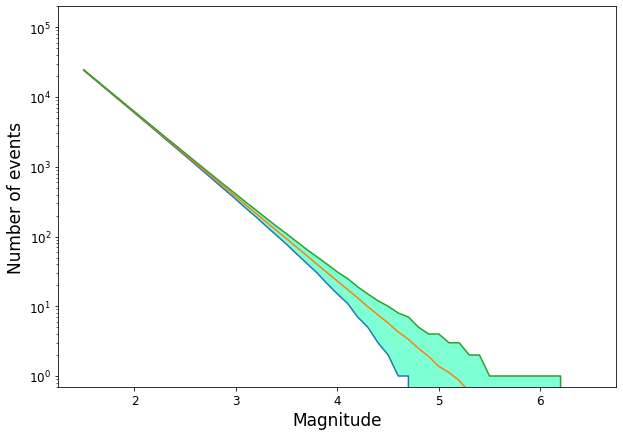

In [121]:

plt.figure(figsize=(10,7))
plt.plot(binned_array,low)
plt.plot(binned_array,mean_arr)
plt.plot(binned_array,up)
plt.yscale('log') # an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000))
plt.fill_between(binned_array, low, up, where=up >= low, facecolor='aquamarine', interpolate=True)
plt.xlabel('Magnitude',fontsize=17)
plt.ylabel('Number of events',fontsize=17)
plt.tick_params(labelsize=12)
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter_simulated_iterative.png",dpi=600)

#### GENERATE 1000 SYNTHETIC CATALOGUES FOR CUMULATIVE EVENTS

In [122]:
#cumulate data set
dropped_new_bin_df2_cum=dropped_new_bin_df2.T
columns_to_sort=[i for i in dropped_new_bin_df2_cum]
low_accumulate=np.array([])
up_accumulate=np.array([])
medium_accumulate=np.array([])
binned_array.index=binned_array
dropped_new_bin_df2_cumulate=binned_array
for i in dropped_new_bin_df2_cum: #iterate over columns
    cum_series=pd.Series(dropped_new_bin_df2_cum[i])
    cum_series=pd.Series(np.add.accumulate(cum_series[::-1])[::-1])
    #cum_series=cum_series.reset_index(drop=True,inplace=True)
    dropped_new_bin_df2_cumulate=pd.concat((dropped_new_bin_df2_cumulate,cum_series),axis=1)
    #dropped_new_bin_df2_cumulate=dropped_new_bin_df2_cumulate.reshape((2,98))

dropped_new_bin_df2_cumulate=dropped_new_bin_df2_cumulate.T.drop([0])
dropped_new_bin_df2_cumulate


0          1.5      1.6      1.7      1.8      1.9      2.0      2.1      2.2  \
1     100000.0  75626.0  57249.0  43385.0  32920.0  24931.0  18817.0  14275.0   
2     100000.0  75654.0  57205.0  43140.0  32631.0  24510.0  18498.0  13991.0   
3     100000.0  75695.0  57305.0  43280.0  32630.0  24597.0  18567.0  14081.0   
4     100000.0  75728.0  57219.0  43373.0  32841.0  24872.0  18854.0  14374.0   
5     100000.0  75567.0  57089.0  43197.0  32815.0  24951.0  18831.0  14257.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
996   100000.0  75545.0  57357.0  43423.0  32829.0  24795.0  18705.0  14125.0   
997   100000.0  75701.0  57245.0  43019.0  32584.0  24428.0  18540.0  14013.0   
998   100000.0  75751.0  57252.0  43310.0  32763.0  24979.0  18958.0  14229.0   
999   100000.0  75529.0  57250.0  43281.0  32716.0  24808.0  18776.0  14129.0   
1000  100000.0  75528.0  57049.0  43242.0  32780.0  24814.0  18778.0  14191.0   

0         2.3     2.4  ...  5.6  5.7  5.8  5.9  6.0  6.1  6.2  6.3  6.4  6.5  
1     10803.0  8173.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     10627.0  8082.0  ...  2.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  0.0  
3     10562.0  7914.0  ...  2.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
4     10889.0  8206.0  ...  2.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5     10787.0  8196.0  ...  3.0  3.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0  0.0  
...       ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
996   10677.0  8125.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
997   10536.0  7906.0  ...  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
998   10787.0  8189.0  ...  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  
999   10623.0  8011.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1000  10791.0  8283.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1000 rows x 51 columns]

#### GENERATE AND PLOT 0.95/ 0.05 CONFIDENCE INTERVAL FOR CUMULATIVE SYNTHETIC CATALOGUES

Text(0.5, 1.0, 'Cumulative events')

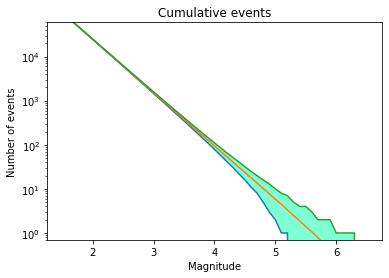

In [138]:
import statistics
#cumulate function
low_cum=np.array([])
up_cum=np.array([])
medium_cum=np.array([])
mean_arr_cum=np.array([])
for i in dropped_new_bin_df2_cumulate:
    mean_cc=dropped_new_bin_df2_cumulate[i].mean()
    mean_arr_cum=np.append(mean_arr_cum,mean_cc)
    low_cum=np.append(low_cum,poisson.ppf(0.05, mean_cc))
    up_cum=np.append(up_cum,poisson.ppf(0.95, mean_cc))  
#cumulate curve
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax1_cum=ax.plot(binned_array,low_cum)
ax2_cum=ax.plot(binned_array,mean_arr_cum)
ax3_cum=ax.plot(binned_array,up_cum)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.set_ylim((0.7, 60000))
ax.fill_between(binned_array, low_cum, up_cum, where=up_cum >= low_cum, facecolor='aquamarine', interpolate=True)
ax.set_xlabel('Magnitude')
ax.set_ylabel('Number of events')
ax.set_title('Cumulative events')


#### PLOT 0.95/ 0.05 CONFIDENCE INTERVAL FOR ITERATIVE AND CUMULATIVE SYNTHETIC CATALOGUES

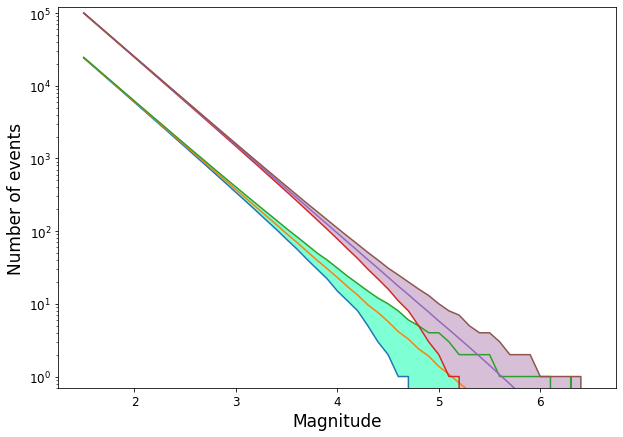

In [119]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(1,1,1)
ax1=ax.plot(binned_array,low)
ax2=ax.plot(binned_array,mean_arr)
ax3=ax.plot(binned_array,up)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.fill_between(binned_array, low, up, where=up >= low, facecolor='aquamarine', interpolate=True)
ax1_cum=ax.plot(binned_array,low_cum)
ax2_cum=ax.plot(binned_array,mean_arr_cum)
ax3_cum=ax.plot(binned_array,up_cum)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.fill_between(binned_array, low_cum, up_cum, where=up_cum >= low_cum, facecolor='thistle', interpolate=True)
ax.set_ylim((0.7, 120000))
ax.set_xlabel('Magnitude',fontsize=17)
ax.set_ylabel('Number of events',fontsize=17)
plt.tick_params(labelsize=12)
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter_simulated_iterative_cumulative.png",dpi=600)


#### PLOT 0.95/ 0.05 CONFIDENCE INTERVAL FOR ITERATIVE AND CUMULATIVE SYNTHETIC CATALOGUES WITH A SINTHETIC CATALOGUE WITHIN

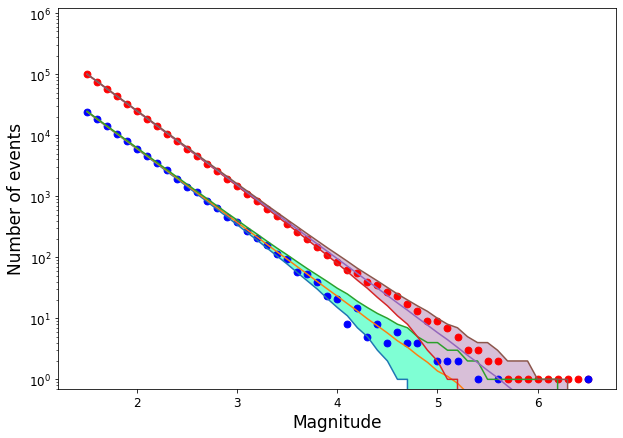

In [175]:


fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(1,1,1)

ax1=ax.plot(binned_array,low)
ax2=ax.plot(binned_array,mean_arr)
ax3=ax.plot(binned_array,up)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.fill_between(binned_array, low, up, where=up >= low, facecolor='aquamarine', interpolate=True)
ax1_cum=ax.plot(binned_array,low_cum)
ax2_cum=ax.plot(binned_array,mean_arr_cum)
ax3_cum=ax.plot(binned_array,up_cum)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.fill_between(binned_array, low_cum, up_cum, where=up_cum >= low_cum, facecolor='thistle', interpolate=True)
ax.set_ylim((0.7, 1200000))
ax.set_xlabel('Magnitude',fontsize=17)
ax.set_ylabel('Number of events',fontsize=17)
plt.tick_params(labelsize=12)
plot=plt.scatter(dropped_new_bin_df2_cumulate.columns.values, dropped_new_bin_df2_cumulate.iloc[2],s=46,color='red')
#replace 2 with 3 if you want to plot the first synth. catalogue
plot2=plt.scatter(dropped_new_bin_df2.columns.values, dropped_new_bin_df2.iloc[2],s=46,color='blue')
#replace 2 with 3 if you want to plot the first synth. catalogue
#plot=sns.scatterplot(x='bin_magnitude',y='number_of_earthquakes',data=df1,s=66)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter_simulated_iterative_cumulative_synthetic2.png",dpi=600)


#### PLOT A SINTHETIC CATALOGUE WITHIN

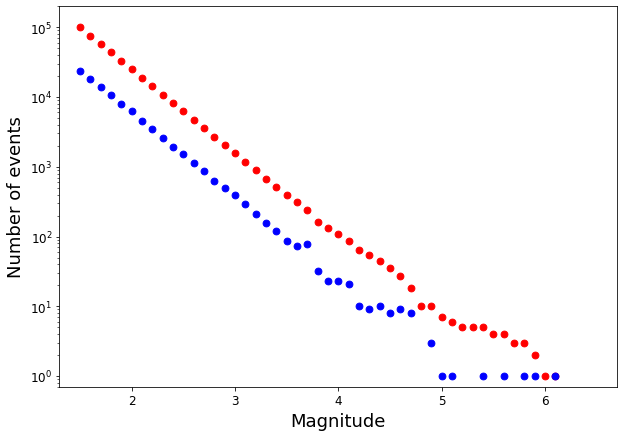

In [130]:
fig=plt.figure(figsize=(10,7))
plot=plt.scatter(dropped_new_bin_df2_cumulate.columns.values, dropped_new_bin_df2_cumulate.iloc[3],s=46,color='red')
plot2=plt.scatter(dropped_new_bin_df2.columns.values, dropped_new_bin_df2.iloc[3],s=46,color='blue')
plt.xlabel("Magnitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("Number of events",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
#plt.title('Magnitude types throughout the years',fontsize=18,pad=15.5)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.xlim((1.3, 6.7))
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter_simulated_iterative_cumulative_synthetic1_simple.png",dpi=600)

#### PLOT A SECOND SINTHETIC CATALOGUE WITHIN

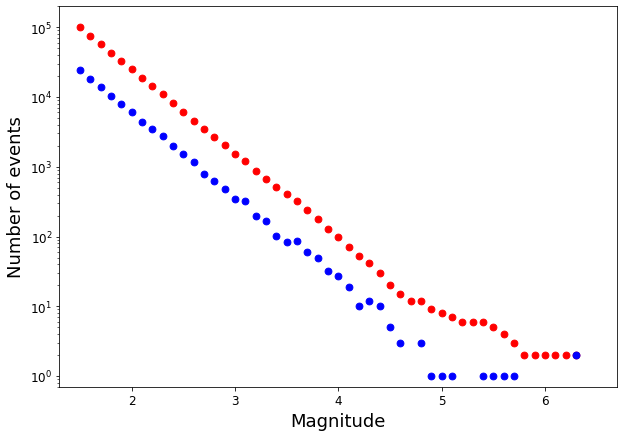

In [134]:
fig=plt.figure(figsize=(10,7))
plot=plt.scatter(dropped_new_bin_df2_cumulate.columns.values, dropped_new_bin_df2_cumulate.iloc[2],s=46,color='red')
plot2=plt.scatter(dropped_new_bin_df2.columns.values, dropped_new_bin_df2.iloc[2],s=46,color='blue')
plt.xlabel("Magnitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("Number of events",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
#plt.title('Magnitude types throughout the years',fontsize=18,pad=15.5)
plt.yscale('log')# an alternative:  plot.set(yscale="log")
plt.ylim((0.7, 200000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.xlim((1.3, 6.7))
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter_simulated_iterative_cumulative_synthetic2_simple.png",dpi=600)

### STOP

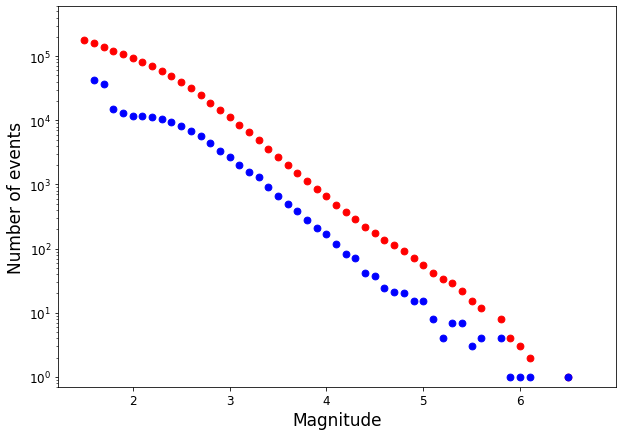

In [163]:
plt.figure(figsize=(10,7))    
plot=plt.scatter(cum_series_1_index,cum_series_1,s=46,color='red')
plt.yscale('log')# an alternative:  plot.set(yscale="log")
#plt.title('Gutemberg Richter (cumulative and iterative events)',fontsize=18,pad=15.5)
plt.ylim((0.7, 600000)) # DO NOT put 0 or negative values 'cause there is a log scale
plt.ylabel('Number of earthquakes',fontsize=17) #set font and title of x label
plt.xlabel('Magnitude',fontsize=17) #set font and title of y label
plt.tick_params(labelsize=12)
plot2=plt.scatter(x='bin_magnitude',y='number_of_earthquakes',data=df1,s=46,color='blue')
plt.ylabel('Number of events',fontsize=17) #set font and title of x label
plt.xlabel('Magnitude',fontsize=17)
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\gut_Richter_iterativeandcumulative_catalogue.png",dpi=600)

In [73]:
data_grouped_magnitude=DATA_with_one.groupby("Magnitude")['Magnitude'].count()
data_thresh=data_grouped_magnitude.iloc[25:]

In [ ]:
dropped_new_bin_df2.loc[]

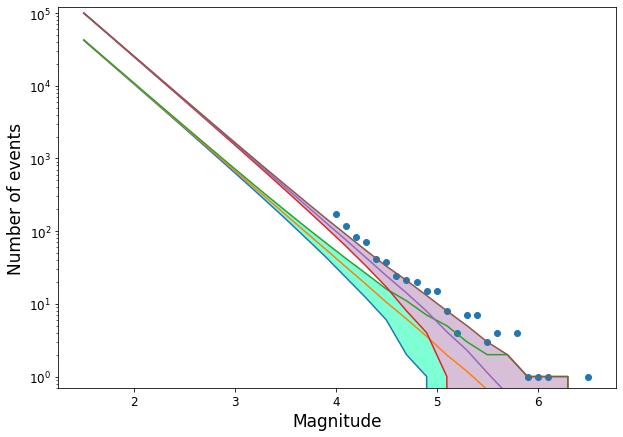

In [75]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(1,1,1)
ax1=ax.plot(binned_array,low)
ax2=ax.plot(binned_array,mean_arr)
ax3=ax.plot(binned_array,up)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.fill_between(binned_array, low, up, where=up >= low, facecolor='aquamarine', interpolate=True)
ax1_cum=ax.plot(binned_array,low_cum)
ax2_cum=ax.plot(binned_array,mean_arr_cum)
ax3_cum=ax.plot(binned_array,up_cum)
ax.set_yscale('log') # an alternative:  plot.set(yscale="log")
ax.fill_between(binned_array, low_cum, up_cum, where=up_cum >= low_cum, facecolor='thistle', interpolate=True)
ax.set_ylim((0.7, 120000))
ax.set_xlabel('Magnitude',fontsize=17)
ax.set_ylabel('Number of events',fontsize=17)
plt.tick_params(labelsize=12)

plt.scatter(data_thresh.index.values,data_thresh)